In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as mp
import time
import skimage as ski

In [2]:
nanos_to_seconds = 1 / 1e6

dete_temp = np.genfromtxt(
	'data/detectorTemp.txt', delimiter=','
	)  #import delimited data
dete_temp = dete_temp[1:]  #trim off nans created from lable line
dete_temp[:, 0] = dete_temp[:,
				  0] * nanos_to_seconds  #convert to seconds right away

dist_dopp = np.genfromtxt(
	'data/distanceAndDoppler.txt', delimiter=','
	)  #import delimited data
dist_dopp = dist_dopp[1:]  #trim off nans created from lable line
dist_dopp[:, 0] = dist_dopp[:,
				  0] * nanos_to_seconds  #convert to seconds right away

inst_tele = np.genfromtxt(
	'data/instrumentTelemetry.txt', delimiter=','
	)  #import delimited data
inst_tele = inst_tele[1:]  #trim off nans created from lable line
inst_tele[:, 0] = inst_tele[:,
				  0] * nanos_to_seconds  #convert to seconds right away

inte_time = np.genfromtxt(
	'data/integrationTime.txt', delimiter=','
	)  #import delimited data
inte_time = inte_time[1:]  #trim off nans created from lable line
inte_time[:, 0] = inte_time[:,
				  0] * nanos_to_seconds  #convert to seconds right away

# plans = np.genfromtxt('lasp_dsse_hw/data/plans.txt', delimiter=',') #import delimited data
# plans = plan[1:] #trim off nans created from lable line

refe_spec = np.genfromtxt(
	'data/referenceSpectrum.txt', delimiter=','
	)  #import delimited data
refe_spec = refe_spec[1:]  #trim off nans created from lable line


4201


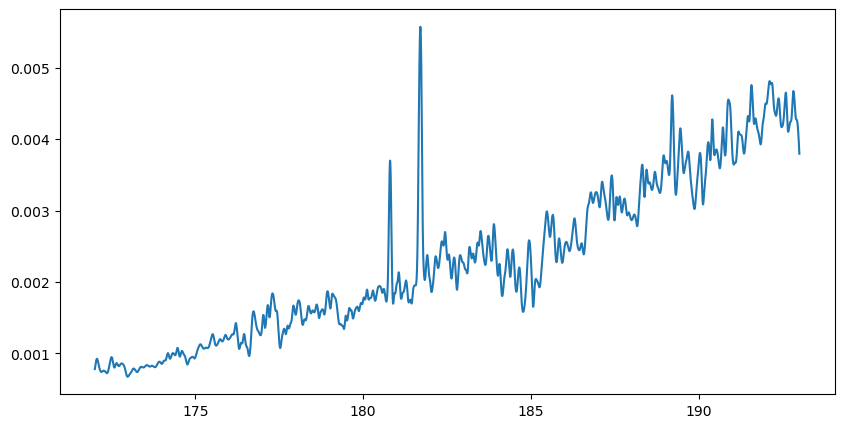

In [3]:
mp.figure(figsize=(10, 5))
mp.plot(
	refe_spec[:, 0], refe_spec[:, 1]
	)  #glance at the refernce spectrum to check sanity
print(len(refe_spec[:, 0]))

down time seconds: 4422.25
dark time seconds: 4413.439999938011
up time seconds: 4404.120000004768
down samples: 2527
dark samples: 4414
up samples: 2517


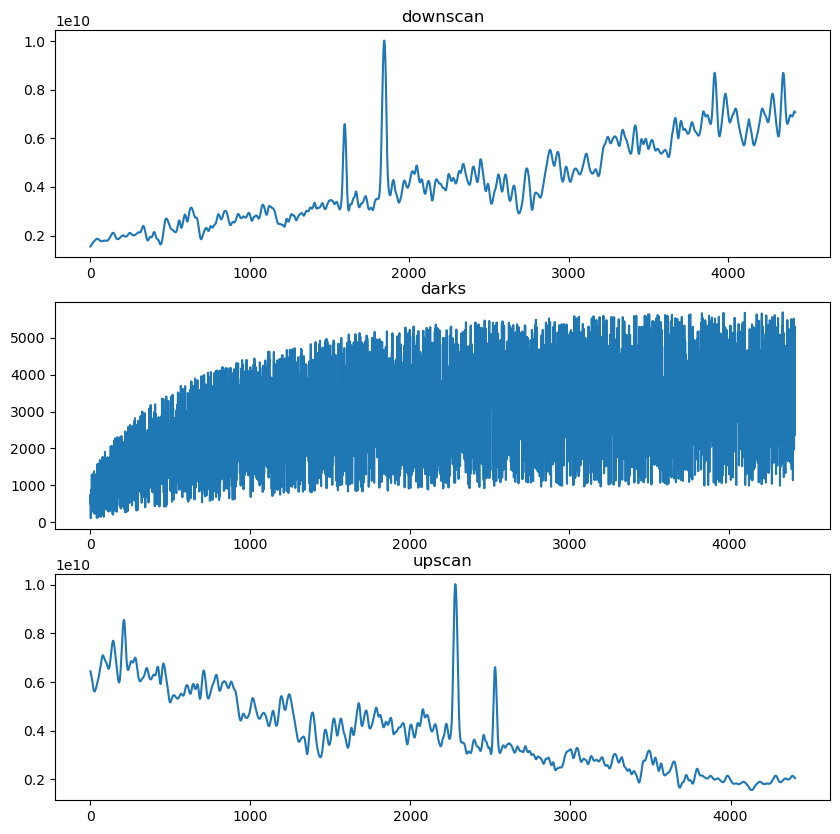

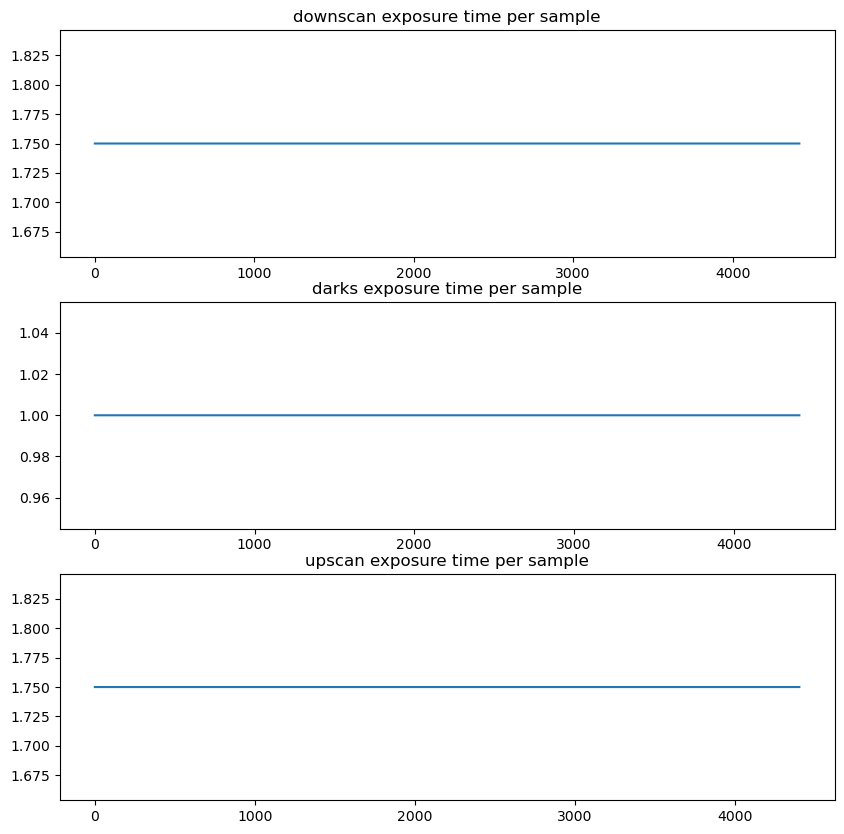

In [4]:
#let's find out what's inside the telemetry
#planName, startTime, endTime #all in µs
#DownScan, 9.434134508500002E14, 9.434178731000002E14
#Dark, 9.434192873600002E14, 9.434237008000002E14
#UpScan, 9.434251237500002E14, 9.434295278700002E14
# we are interested in the "plan" which starts at 9.434134508500002E14
down_start_time = 9.434134508500002e8
down_end_time = 9.434178731000002e8
print("down time seconds: " + str((down_end_time - down_start_time)))
dark_start_time = 9.434192873600002e8
dark_end_time = 9.434237008000002e8
print("dark time seconds: " + str((dark_end_time - dark_start_time)))
up_start_time = 9.434251237500002e8
up_end_time = 9.434295278700002e8
print("up time seconds: " + str((up_end_time - up_start_time)))

data_end_time = 9.434295267500002E14  #instrument telemetry ends at 9.434295267500002E14, which isn't the end of the upscan planned time, so that's a thing to figure out.

down_start = np.where(inst_tele[:, 0] >= down_start_time)[0][0]
down_end = np.where(inst_tele[:, 0] >= down_end_time)[0][0]
print("down samples: " + str(down_end - down_start))
dark_start = np.where(inst_tele[:, 0] >= dark_start_time)[0][0]
dark_end = np.where(inst_tele[:, 0] >= dark_end_time)[0][0]
print("dark samples: " + str(dark_end - dark_start))
up_start = np.where(inst_tele[:, 0] >= up_start_time)[0][0]
up_end = len(
	inst_tele[:, 0]
	)  #np.where (inst_tele[:,0]==up_end_time)[0][0] #this breaks, looks like the data ends before the plan does.
print("up samples: " + str(up_end - up_start))

down = inst_tele[down_start:down_end, :]
dark = inst_tele[dark_start:dark_end, :]
up = inst_tele[up_start:up_end, :]

#we got lucky that "==" worked, though we could have done ">" and taken the first element of the output array.

# mp.figure(figsize=(9,3))
# mp.title('microsecondsSinceGpsEpoch per data point')
# mp.plot(inst_tele[down_start:up_end-1,0]-down_start_time,np.diff(inst_tele[down_start:up_end,0]))
# mp.show()

# mp.figure(2,figsize=(9,3))
fig, axs = mp.subplots(3, 1, figsize=(10, 10))
axs[0].plot(down[:, 0] - down[0, 0], down[:, 2])
axs[0].title.set_text('downscan')
axs[1].plot(dark[:, 0] - dark[0, 0], dark[:, 2])
axs[1].title.set_text('darks')
axs[2].plot(up[:, 0] - up[0, 0], up[:, 2])
axs[2].title.set_text('upscan')
# fig.show()

# mp.figure(2,figsize=(9,3))
fig, axs = mp.subplots(3, 1, figsize=(10, 10))
axs[0].plot(down[:-1, 0] - down[0, 0], np.diff(down[:, 0]))
axs[0].title.set_text('downscan exposure time per sample')
axs[1].plot(dark[:-1, 0] - dark[0, 0], np.diff(dark[:, 0]))
axs[1].title.set_text('darks exposure time per sample')
axs[2].plot(up[:-1, 0] - up[0, 0], np.diff(up[:, 0]))
axs[2].title.set_text('upscan exposure time per sample')

down_exposure = 1.75
up_exposure = 1.75
dark_exposure = 1.0

down time seconds: 4422.25
dark time seconds: 4413.439999938011
up time seconds: 4404.120000004768
down samples: 4422
dark samples: 4414
up samples: 4405
rough estimate of sunlight temp delta: 2.9059364733850934


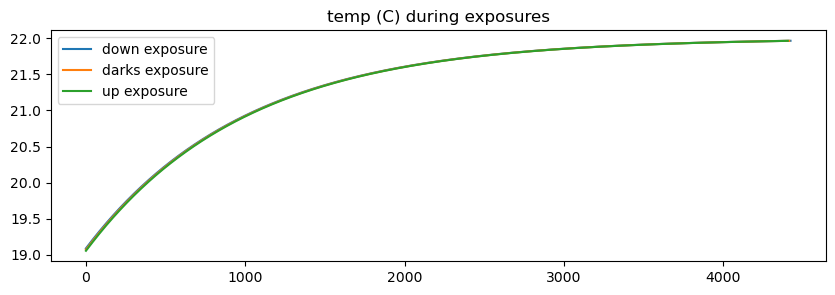

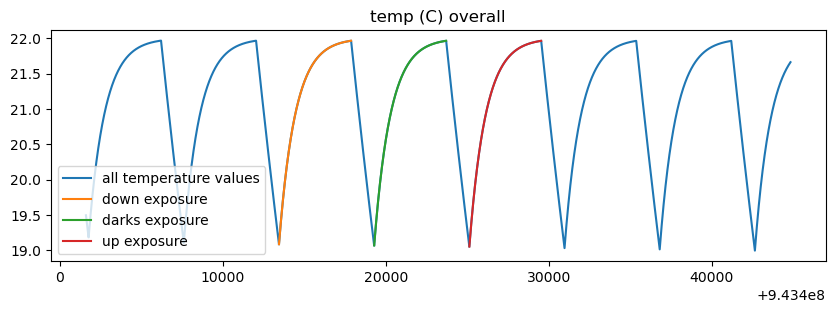

In [5]:
down_start_time = 9.434134508500002e8
down_end_time = 9.434178731000002e8
print("down time seconds: " + str((down_end_time - down_start_time)))
dark_start_time = 9.434192873600002e8
dark_end_time = 9.434237008000002e8
print("dark time seconds: " + str((dark_end_time - dark_start_time)))
up_start_time = 9.434251237500002e8
up_end_time = 9.434295278700002e8
print("up time seconds: " + str((up_end_time - up_start_time)))

down_start_temp = np.where(dete_temp[:, 0] >= down_start_time)[0][0]
down_end_temp = np.where(dete_temp[:, 0] >= down_end_time)[0][0]
print("down samples: " + str(down_end_temp - down_start_temp))
dark_start_temp = np.where(dete_temp[:, 0] >= dark_start_time)[0][0]
dark_end_temp = np.where(dete_temp[:, 0] >= dark_end_time)[0][0]
print("dark samples: " + str(dark_end_temp - dark_start_temp))
up_start_temp = np.where(dete_temp[:, 0] >= up_start_time)[0][0]
up_end_temp = np.where(dete_temp[:, 0] >= up_end_time)[0][
	0] 
print("up samples: " + str(up_end_temp - up_start_temp))

print(
	'rough estimate of sunlight temp delta: ' + str(
		dete_temp[up_end_temp, 1] - dete_temp[up_start_temp, 1]
		)
	)

down_temp = dete_temp[down_start_temp:down_end_temp, :]
dark_temp = dete_temp[dark_start_temp:dark_end_temp, :]
up_temp = dete_temp[up_start_temp:up_end_temp, :]

mp.figure(figsize=(10, 3))
mp.title('temp (C) during exposures')
mp.plot(down_temp[:, 0] - down_temp[0, 0], down_temp[:, 1])
mp.plot(dark_temp[:, 0] - dark_temp[0, 0], dark_temp[:, 1])
mp.plot(up_temp[:, 0] - up_temp[0, 0], up_temp[:, 1])
mp.legend(['down exposure', 'darks exposure', 'up exposure'])
# mp.plot(dete_temp[162:4604,1])

ax = mp.figure(figsize=(10, 3))
mp.title('temp (C) overall')
mp.plot(dete_temp[:, 0], dete_temp[:, 1])
mp.plot(down_temp[:, 0], down_temp[:, 1])
mp.plot(dark_temp[:, 0], dark_temp[:, 1])
mp.plot(up_temp[:, 0], up_temp[:, 1])
mp.legend(
	['all temperature values', 'down exposure', 'darks exposure', 'up exposure']
	)


/var/folders/mp/k4kwc0t11kx7jzwyr3fqtvsh0000gn/T/ipykernel_8256/820920433.py:8: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x + c) + d
/usr/local/Caskroom/miniconda/base/envs/hrrr/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


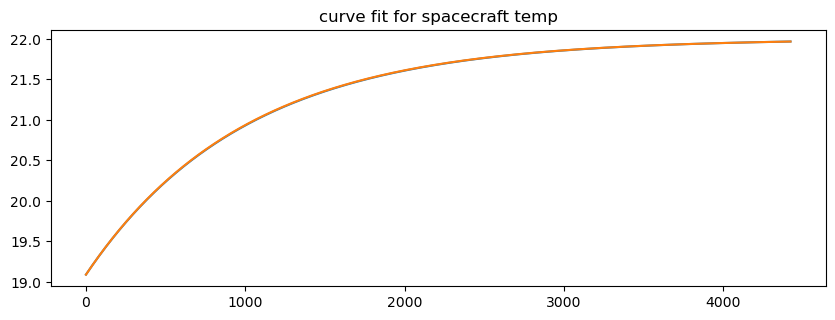

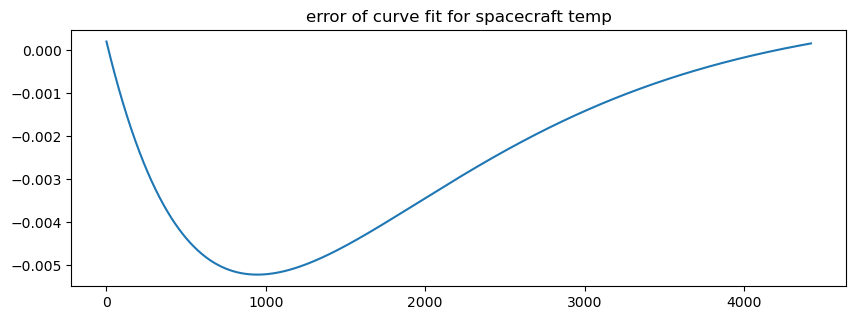

In [45]:
#lets try axtracting a curve from temp, to see if we'll be able to use the method for the noisier darks
#this ended up being the wrong way to go about it, but hey it's interesting to see how well an object aligned to the sun for constant exposed area heats up exactly like the theoretical physics says it should.
sample_pass = dete_temp[down_start_temp:down_end_temp, :]


#we need a function to fit the shape of a-exp(b/(x-c))
def heat_curve(x, a, b, c, d):
	return a * np.exp(b * x + c) + d


def minimization(args):
	a, b, c, d = args[0], args[1], args[2], args[3]
	array1 = sample_pass[:, 1]
	array2 = heat_curve(sample_pass[:, 0] - sample_pass[0, 0], a, b, c, d)
	dist = array1 - array2
	return sum(dist)


# ans = sp.optimize.minimize(minimization,np.asarray([30,sample_pass[0,0]+1e9/1e9,1/1e9]),method='COBYLA',tol=1e-3)
ans = sp.optimize.minimize(
	minimization, 
	np.asarray([-1, -1 / 9.94e2, 9.49094e5 + 15.1685, 21.999]), 
	method='SLSQP', 
	options={'ftol': 0.01, 'eps': 0.0001}
	)
mp.figure(figsize=(10, 3.33))
mp.title('curve fit for spacecraft temp')
mp.plot(sample_pass[:, 0] - sample_pass[0, 0], sample_pass[:, 1])
mp.plot(
	sample_pass[:, 0] - sample_pass[0, 0],
	heat_curve(sample_pass[:, 0], -1, -1 / 9.94e2, 9.49094e5 + 15.1685, 21.999)
	)
# #ok, so I'm able to improve the optimization by hand, by looking at the graph, so I'm going to say that the optimize function isn't doing much here.
# 
# print(ans)

mp.figure(figsize=(10, 3.33))
mp.title('error of curve fit for spacecraft temp')
mp.plot(
	sample_pass[:, 0] - sample_pass[0, 0], 
	sample_pass[:, 1] - heat_curve(sample_pass[:, 0], -1, -1 / 9.94e2, 9.49094e5 + 15.1685, 21.999)
	)

In [7]:
# I want some filters, so I'm copying these for a former project of mine, these are exclusively my work, so they fit within the allowed resources. 
import math as m
import numpy as np
import typing
import xarray as xr


def fourier_filter(
		signal: typing.Union[np.ndarray, xr.DataArray],
		frequency: float,
		cutoff_frequency_low: float = 0,
		cutoff_frequency_high: float = 0,
		time_axis: int = 0,
		low_pass: bool = False,
		high_pass: bool = False,
		band_pass: bool = False,
		band_block: bool = False
		) -> typing.Union[np.ndarray, xr.DataArray]:
	"""Filter a dataset by frequency. This function allows for low_pass,
    high_pass, band_pass, or band_block filtering of the data's freqency
    representation.

    Parameters
    ----------
    signal : ndarray, :class:`xarray.DataArray`
        n-dimensional dataset

    frequency : :class:`float`
        sample frequency of dataset

    cutoff_frequency_low : float, optional
        low frequency for cutting fourier transform, used by low_pass, band_pass, band_block. Defaults to 0.

    cutoff_frequency_high : float, optional
        high frequency for cutting fourier transform, used by low_pass, band_pass, band_block. Defaults to 0.

    time_axis : int, optional
        the time axis of the data set. Defaults to 0.

    low_pass : bool, optional
        runs a low_pass filter on the data if set to True. Defaults to False.

    high_pass : bool, optional
        runs a high_pass filter on the data if set to True. Defaults to False.

    band_pass : bool, optional
        runs a band_pass filter on the data if set to True. Defaults to False.

    band_block : bool, optional
        runs a band_block filter on the data if set to True. Defaults to False.

    Returns
    -------
    return_signal : ndarray, :class:`xarray.DataArray`
        signal with specified filters applied

    """
	resolution = frequency / len(signal)
	signal = np.swapaxes(signal, time_axis, 0)
	res_fft = np.fft.fft(signal, axis=0)
	cfl_index = m.floor(cutoff_frequency_low / resolution)
	cfln_index = 1 - cfl_index
	cfh_index = m.ceil(cutoff_frequency_high / resolution)
	cfhn_index = 1 - cfh_index
	if low_pass:
		if cfl_index > 1:
			res_fft[cfl_index:cfln_index] = np.zeros(
				res_fft[cfl_index:cfln_index].shape
				)
		else:
			res_fft[cfl_index:] = np.zeros(res_fft[cfl_index:].shape)
	if high_pass:
		res_fft[:cfh_index] = np.zeros(res_fft[:cfh_index].shape)
		if cfh_index > 1:
			res_fft[cfhn_index:] = np.zeros(res_fft[cfhn_index:].shape)
	if band_pass:
		res_fft[:cfl_index] = np.zeros(res_fft[:cfl_index].shape)
		if cfh_index > 1:
			res_fft[cfh_index:cfhn_index] = np.zeros(
				res_fft[cfh_index:cfhn_index].shape
				)
		else:
			res_fft[cfh_index:] = np.zeros(res_fft[cfh_index:].shape)
		if cfl_index > 1:
			res_fft[cfln_index:] = np.zeros(res_fft[cfln_index:].shape)
	if band_block:
		res_fft[cfl_index:cfh_index] = np.zeros(
			res_fft[cfl_index:cfh_index].shape
			)
		if cfl_index > 1 and cfh_index > 1:
			res_fft[cfhn_index:cfln_index] = np.zeros(
				res_fft[cfhn_index:cfln_index].shape
				)
		elif cfh_index > 1:
			res_fft[cfhn_index:] = np.zeros(res_fft[cfhn_index:].shape)
	result = np.fft.ifft(res_fft, axis=0)
	result = np.real(result)
	result = np.swapaxes(result, time_axis, 0)
	if type(signal) == xr.DataArray:
		xr_result = signal.copy()
		xr_result.data = result
		result = xr_result
	return result


def fourier_low_pass(
		signal: typing.Union[np.ndarray, xr.DataArray],
		frequency: float,
		cutoff_frequency_low: float,
		time_axis: int = 0
		) -> typing.Union[np.ndarray, xr.DataArray]:
	"""Filter a dataset by frequency. This function allowes for low_pass
    filtering of the data's freqency representation.

    Parameters
    ----------
    signal : ndarray, :class:`xarray.DataArray`
        n-dimensional dataset

    frequency : :class:`float`
        sample frequency of dataset

    cutoff_frequency_low : :class:`float`
        low frequency for cutting fourier transform

    time_axis : int, optional
        the time axis of the data set. Defaults to 0.

    Returns
    -------
    return_signal : ndarray, :class:`xarray.DataArray`
        signal with specified filters applied
    """
	return fourier_filter(
		signal,
		frequency,
		cutoff_frequency_low=cutoff_frequency_low,
		time_axis=time_axis,
		low_pass=True
		)


def fourier_high_pass(
		signal: typing.Union[np.ndarray, xr.DataArray],
		frequency: float,
		cutoff_frequency_high: float,
		time_axis: int = 0
		) -> typing.Union[np.ndarray, xr.DataArray]:
	"""Filter a dataset by frequency. This function allowes for high_pass
    filtering of the data's freqency representation.

    Parameters
    ----------
    signal : ndarray, :class:`xarray.DataArray`
        n-dimensional dataset

    frequency : :class:`float`
        sample frequency of dataset

    cutoff_frequency_high : :class:`float`
        high frequency for cutting fourier transform

    time_axis : int, optional
        the time axis of the data set. Defaults to 0.

    Returns
    -------
    return_signal : ndarray, :class:`xarray.DataArray`
        signal with specified filters applied
    """
	return fourier_filter(
		signal,
		frequency,
		cutoff_frequency_high=cutoff_frequency_high,
		time_axis=time_axis,
		high_pass=True
		)


def fourier_band_pass(
		signal: typing.Union[np.ndarray, xr.DataArray],
		frequency: float,
		cutoff_frequency_low: float,
		cutoff_frequency_high: float,
		time_axis: int = 0
		) -> typing.Union[np.ndarray, xr.DataArray]:
	"""Filter a dataset by frequency. This function allowes for band_pass
    filtering of the data's freqency representation.

    Parameters
    ----------
    signal : ndarray, :class:`xarray.DataArray`
        n-dimensional dataset

    frequency : :class:`float`
        sample frequency of dataset

    cutoff_frequency_low : :class:`float`
        low frequency for cutting fourier transform

    cutoff_frequency_high : :class:`float`
        high frequency for cutting fourier transform

    time_axis : int, optional
        the time axis of the data set. Defaults to 0.

    Returns
    -------
    return_signal : ndarray, :class:`xarray.DataArray`
        signal with specified filters applied
    """
	return fourier_filter(
		signal,
		frequency,
		cutoff_frequency_low=cutoff_frequency_low,
		cutoff_frequency_high=cutoff_frequency_high,
		time_axis=time_axis,
		band_pass=True
		)


def fourier_band_block(
		signal: typing.Union[np.ndarray, xr.DataArray],
		frequency: float,
		cutoff_frequency_low: float,
		cutoff_frequency_high: float,
		time_axis: int = 0
		) -> typing.Union[np.ndarray, xr.DataArray]:
	"""Filter a dataset by frequency. This function allowes for band_block
    filtering of the data's freqency representation.

    Parameters
    ----------
    signal : ndarray, :class:`xarray.DataArray`
        n-dimensional dataset

    frequency : :class:`float`
        sample frequency of dataset

    cutoff_frequency_low : :class:`float`
        low frequency for cutting fourier transform

    cutoff_frequency_high : :class:`float`
        high frequency for cutting fourier transform

    time_axis : int, optional
        the time axis of the data set. Defaults to 0.

    Returns
    -------
    return_signal : ndarray, :class:`xarray.DataArray`
        signal with specified filters applied
    """
	return fourier_filter(
		signal,
		frequency,
		cutoff_frequency_low=cutoff_frequency_low,
		cutoff_frequency_high=cutoff_frequency_high,
		time_axis=time_axis,
		band_block=True
		)

[ 17.85637873 827.45267141]
median dark, after adjustment: 19.595574565570132
mean dark, after adjustment: -0.0003613261787603946


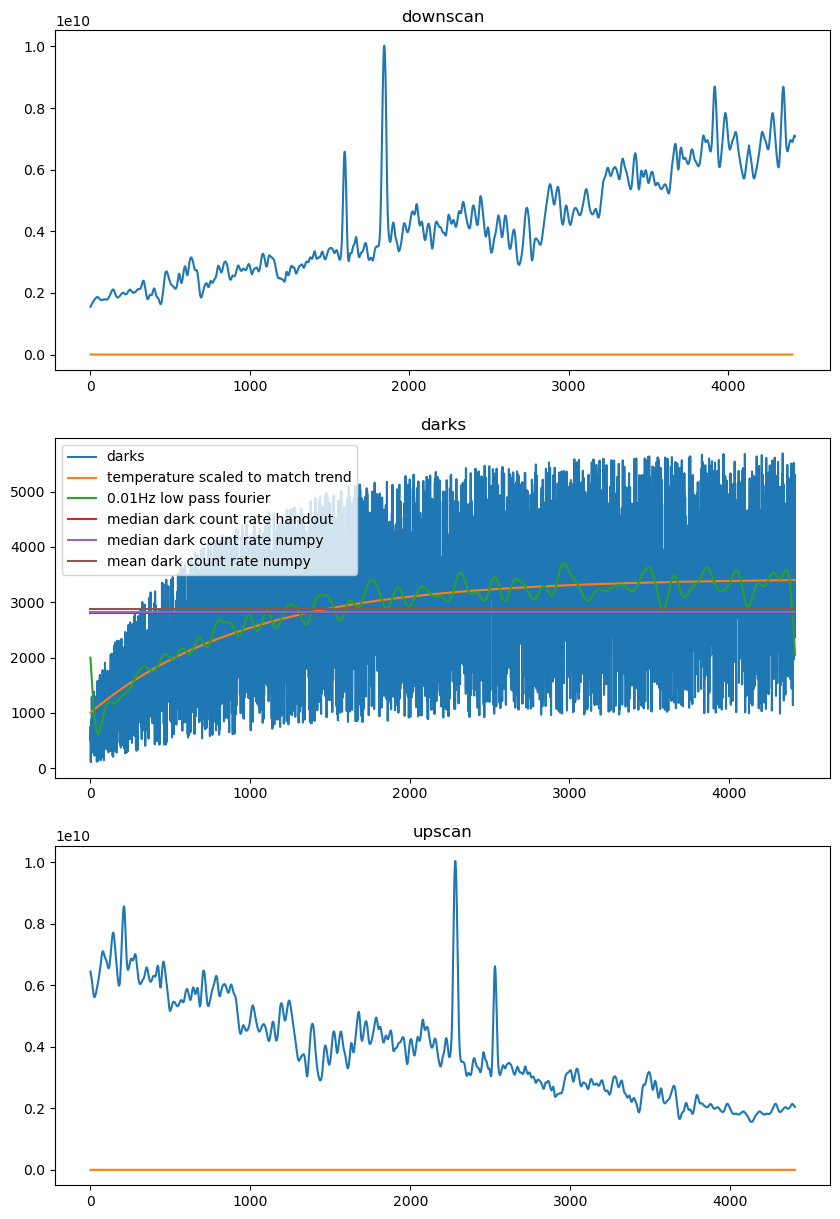

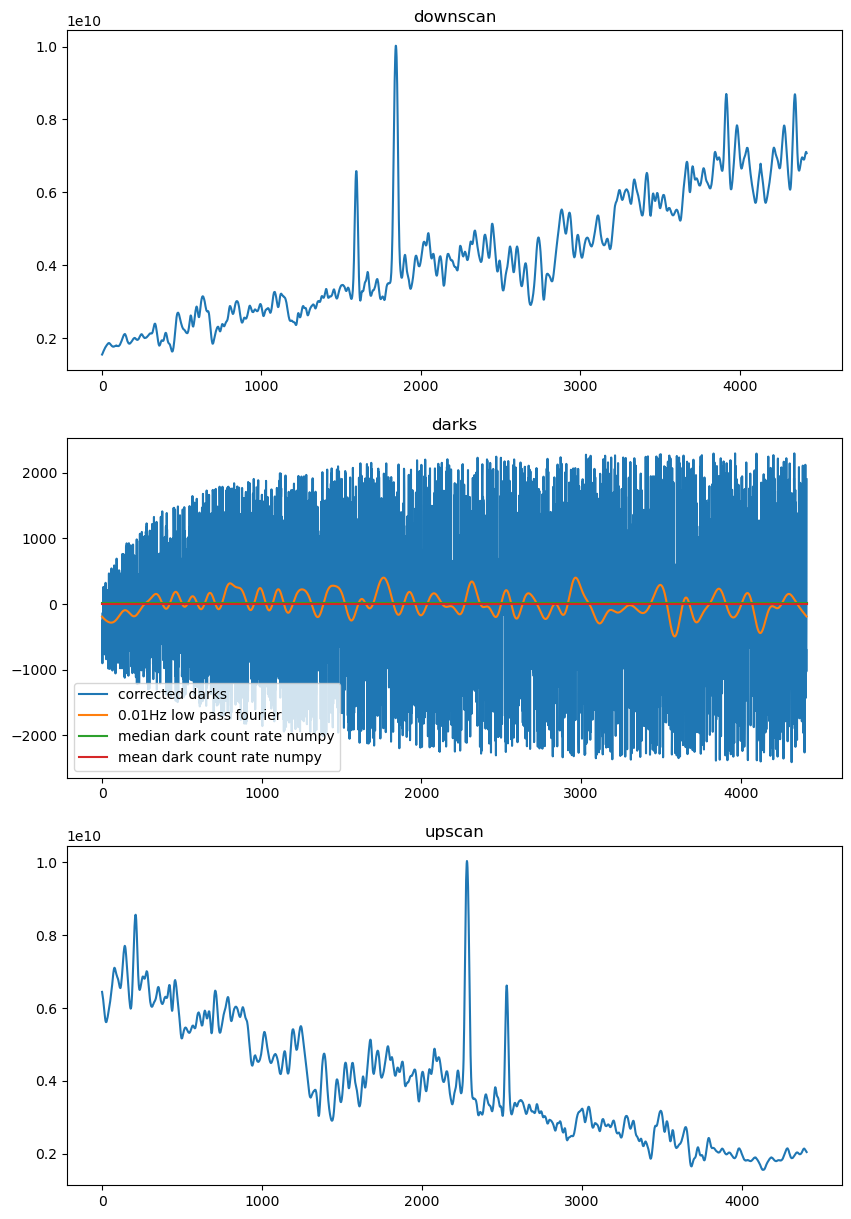

In [8]:
#Temp correction
fig, axs = mp.subplots(3, 1, figsize=(10, 15))
axs[1].title.set_text('darks')
axs[1].plot(dark[:, 0] - dark[0, 0], dark[:, 2])

#darks using a linear fit of temperature
def minimization(args):
	a, b = args[0], args[1]
	array1 = dark[:, 2]
	array2 = (dark_temp[:, 1] - a) * b
	dist = array1 - array2
	return sum(dist ** 2)

temp_fit = sp.optimize.minimize(
	minimization, np.asarray([-18, 800]), method='SLSQP'
	)
print(temp_fit.x)
axs[1].plot(
	dark_temp[:, 0] - dark_temp[0, 0],
	(dark_temp[:, 1] - temp_fit.x[0]) * temp_fit.x[1]
	)

#show the trend using a low pass filter
axs[1].plot(dark[:, 0] - dark[0, 0], fourier_low_pass(dark[:, 2], 1, 1 / 100))

#darks the handout way
dark_integrationTime = 1.0
dark_counts_handout = dark[:, 2]  #number of darculas (dark counts)
detectorTemp = dark_temp[:, 1]
tempCorrFactor = 0.0061628  # [counts/degC]
dark_count_rate = dark_counts_handout / dark_integrationTime
dark_count_rate_corr = dark_count_rate * (
		1.0 + tempCorrFactor * (20.0 - detectorTemp))
median_dark_count_rate1 = np.median(dark_count_rate_corr)
axs[1].plot(
	[0, dark_temp[-1, 0] - dark_temp[0, 0]],
	[median_dark_count_rate1, median_dark_count_rate1]
	)

#ez mode median dark count rate using np.median()
median_dark_count_rate2 = np.median(dark[:, 2])
axs[1].plot(
	[0, dark[-1, 0] - dark[0, 0]],
	[median_dark_count_rate2, median_dark_count_rate2]
	)

mean_dark_count_rate2 = np.mean(dark[:, 2])
axs[1].plot(
	[0, dark[-1, 0] - dark[0, 0]],
	[mean_dark_count_rate2, mean_dark_count_rate2]
	)

axs[1].legend(
	['darks', 'temperature scaled to match trend', '0.01Hz low pass fourier',
	 'median dark count rate handout', 'median dark count rate numpy', 'mean dark count rate numpy']
	)

axs[2].title.set_text('upscan')
axs[2].plot(
	up[:, 0] - up[0, 0], up[:, 2]
	)
axs[2].plot(
	up_temp[:, 0] - up_temp[0, 0],
	(up_temp[:, 1] - temp_fit.x[0]) * temp_fit.x[1]
	)

axs[0].title.set_text('downscan')
axs[0].plot(down[:, 0] - down[0, 0], down[:, 2])
axs[0].plot(
	up_temp[:, 0] - up_temp[0, 0],
	(up_temp[:, 1] - temp_fit.x[0]) * temp_fit.x[1]
	)

# maybe use scikit-image.transform.resize to get the heat curve in the same length as the data bins, this is a handy tool for rescaling arrays, it defaults to linear interpolation which is close enough, but could be expanded up to 5th order if needed.
up_temp_counts = ski.transform.resize(
	(up_temp[:, 1] - temp_fit.x[0]) * temp_fit.x[1] * up_exposure,
	(len(up),),
	mode='edge'
	)

down_temp_counts = ski.transform.resize(
	(down_temp[:, 1] - temp_fit.x[0]) * temp_fit.x[1] * down_exposure,
	(len(down),),
	mode='edge'
	)

dark_temp_counts = ski.transform.resize(
	(dark_temp[:, 1] - temp_fit.x[0]) * temp_fit.x[1] * dark_exposure,
	(len(dark),),
	mode='edge'
	)

#TODO the count rate correction needs to be applied in addition to the dark correction.
# tempCorrFactor = 0.0061628  # [counts/degC]
# count_rate_corr = count_rate * (1.0 + tempCorrFactor * (20.0 - detectorTemp))
# this should be done after(?) the dark temp subtraction.
# my read is that this corrects for differential sensor sensitivity, which would be the photon counts other than the thermal effects accounted for using "darks" so it should be calculated based on the post-dark removal value. 
down_corr_counts = (down[:,2]-down_temp_counts)*(tempCorrFactor * (20-ski.transform.resize(down_temp[:, 1],(len(down),),mode='edge'))) # we are only taking the diffence value here, and will subtract it later
up_corr_counts = (up[:,2]-up_temp_counts)*(tempCorrFactor * (20-ski.transform.resize(up_temp[:, 1],(len(up),),mode='edge'))) # we are only taking the diffence value here, and will subtract it later

#double check everything
fig, axs = mp.subplots(3, 1, figsize=(10, 15))
axs[1].title.set_text('darks')
axs[1].plot(dark[:, 0] - dark[0, 0], dark[:, 2] - dark_temp_counts)
axs[1].plot(dark[:, 0] - dark[0, 0], fourier_low_pass(dark[:, 2] - dark_temp_counts, 1, 1 / 100))
median_dark_count_rate2 = np.median(dark[:, 2] - dark_temp_counts)
axs[1].plot(
	[0, dark[-1, 0] - dark[0, 0]],
	[median_dark_count_rate2, median_dark_count_rate2]
	)
mean_dark_count_rate2 = np.mean(dark[:, 2] - dark_temp_counts)
axs[1].plot(
	[0, dark[-1, 0] - dark[0, 0]],
	[mean_dark_count_rate2, mean_dark_count_rate2]
	)
axs[1].legend(
	['corrected darks', 
	 '0.01Hz low pass fourier', 
	 'median dark count rate numpy', 
	 'mean dark count rate numpy']
	)
print('median dark, after adjustment: ' + str(np.median(dark[:, 2] - dark_temp_counts)))
print('mean dark, after adjustment: ' + str(np.mean(dark[:, 2] - dark_temp_counts)))
axs[2].title.set_text('upscan')
axs[2].plot(up[:, 0] - up[0, 0], up[:, 2] - up_temp_counts)
axs[0].title.set_text('downscan')
axs[0].plot(down[:, 0] - down[0, 0], down[:, 2] - down_temp_counts)

down samples: 73
dark samples: 74
up samples: 74
spectral peak wavelength from dopper corrected data
reference: 181.705nm
up scan: 181.7349086494973nm
down scan: 181.7149570164855nm
downscan wavelength offset-0.009957016485486747
upscan wavelength offset-0.029908649497286888


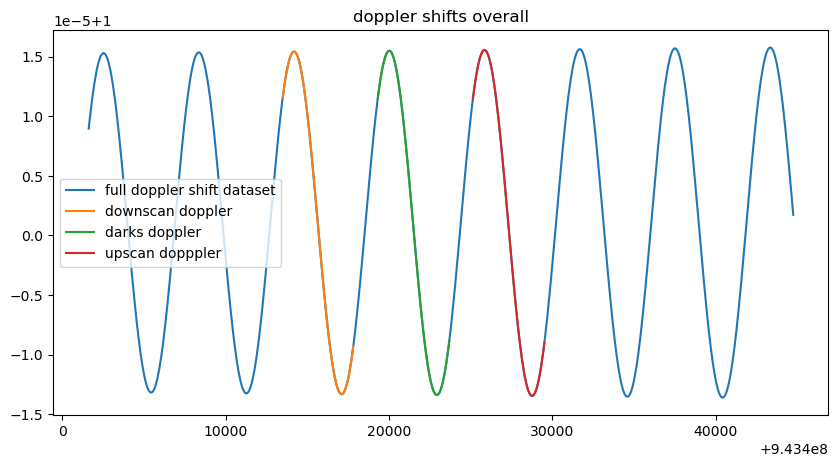

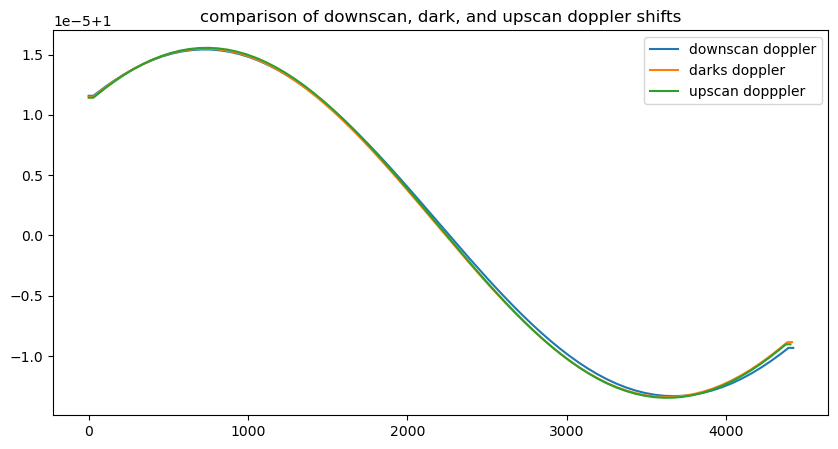

In [49]:
#wavelengths
offset = 239532.38
stepSize = 2.4237772022101214E-6  # [rad/step]
d = 277.77777777777777  # [nm]
phiGInRads = 0.08503244115716374  # [rad]
#gratingPosition comes from inst_tele[:,1]
gratingPosition = inst_tele[:, 1]
ang1 = (offset - gratingPosition) * stepSize  # [rad]
wavelength = 2 * d * np.sin(ang1) * np.cos(phiGInRads / 2.0)  # [nm]
#I know that the angular dispersion from a diffraction grating is not linear with wavelength, and that this equation is using a linear assumption, I'm not going to attempt (yet) to rederive this for a hardware configuration I know almost nothing about, but I want to. 
down_wave_raw = wavelength[down_start:down_end]
up_wave_raw = wavelength[up_start:up_end]

#I need to do the doppler shift array as well, this is more time dependant (spacecraft velocity) and while "can be ignored for this excercise" is written in the lore, I don't think I'm going to ignore it. it should be relatively straightforard to do with the tools and data at hand, so let's give it half an hour to find out.

down_start_dopp = np.where(dist_dopp[:, 0] >= down_start_time)[0][0]
down_end_dopp = np.where(dist_dopp[:, 0] >= down_end_time)[0][0]
print("down samples: " + str(down_end_dopp - down_start_dopp))
dark_start_dopp = np.where(dist_dopp[:, 0] >= dark_start_time)[0][0]
dark_end_dopp = np.where(dist_dopp[:, 0] >= dark_end_time)[0][0]
print("dark samples: " + str(dark_end_dopp - dark_start_dopp))
up_start_dopp = np.where(dist_dopp[:, 0] >= up_start_time)[0][0]
up_end_dopp = np.where(dist_dopp[:, 0] >= up_end_time)[0][0]
print("up samples: " + str(up_end_dopp - up_start_dopp))

down_dopp = dist_dopp[down_start_dopp:down_end_dopp,:]
dark_dopp = dist_dopp[dark_start_dopp:dark_end_dopp,:]
up_dopp = dist_dopp[up_start_dopp:up_end_dopp,:]

mp.figure(figsize=(10,5))
mp.title('doppler shifts overall')
mp.plot(dist_dopp[:,0], dist_dopp[:,2])
mp.plot(down_dopp[:,0], down_dopp[:,2])
mp.plot(dark_dopp[:,0], dark_dopp[:,2])
mp.plot(up_dopp[:,0], up_dopp[:,2])
mp.legend(['full doppler shift dataset','downscan doppler','darks doppler','upscan dopppler'])

#we don't have a lot of samples, so we're going to use ski.transofrm.resize again, I do like this functions for giving exactly what I need a lot of the time.
up_dopp_shifts = ski.transform.resize(
	up_dopp[:,2],
	(len(up),),
	mode='edge'
	)
dark_dopp_shifts = ski.transform.resize(
	dark_dopp[:,2],
	(len(dark),),
	mode='edge'
	)
down_dopp_shifts = ski.transform.resize(
	down_dopp[:,2],
	(len(down),),
	mode='edge'
	)

mp.figure(figsize=(10,5))
mp.title('comparison of downscan, dark, and upscan doppler shifts' )
mp.plot(down[:,0]-down[0,0], down_dopp_shifts[:])
mp.plot(dark[:,0]-dark[0,0], dark_dopp_shifts[:])
mp.plot(up[:,0]-up[0,0], up_dopp_shifts[:])
mp.legend(['downscan doppler','darks doppler','upscan dopppler'])

#adjust the raw wave for doppler
down_wave_dopp = down_wave_raw * down_dopp_shifts
up_wave_dopp = up_wave_raw * up_dopp_shifts

# fig, axs = mp.subplots(3, 1, figsize=(10, 15))
# axs[0].plot(refe_spec[:, 0], refe_spec[:, 1])
# axs[0].plot(
# 	up_wave_raw,
# 	up[:, 2] * np.max(refe_spec[:, 1]) / np.max(up[:, 2])
# 	)
# 
# axs[1].plot(refe_spec[:, 0], refe_spec[:, 1])
# axs[1].plot(
# 	down_wave_raw,
# 	down[:, 2] * np.max(refe_spec[:, 1]) / np.max(down[:, 2])
# 	)
# 
# axs[2].plot(
# 	up_wave_raw,
# 	up[:, 2] * np.max(refe_spec[:, 1]) / np.max(up[:, 2])
# 	)
# axs[2].plot(
# 	down_wave_raw, 
# 	down[:, 2] * np.max(refe_spec[:, 1]) / np.max(down[:, 2])
# 	)
#grating shift offest in terms of spectrum.
print('spectral peak wavelength from dopper corrected data')
print(
	'reference: ' 
	+ str(refe_spec[np.where(refe_spec[:, 1] == np.max(refe_spec[:, 1])), 0][0][0]) 
	+ 'nm'
	)
print(
	'up scan: '
	+ str(up_wave_dopp[np.where(up[:, 2] == np.max(up[:, 2]))][0])
	+ 'nm'
	)
print(
	'down scan: '
	+ str(down_wave_dopp[np.where(down[:, 2] == np.max(down[:, 2]))][0]) 
	+ 'nm'
	)
#this naive alignment technique has a potential error of ± stepsize/2
# in this case 0.006339413449239828 nm
# this error could be automatically removed by using maximum of a polyfit,
# which I'll do if every higher proirity task for this is done.
reference_peak = refe_spec[np.where(refe_spec[:, 1] == np.max(refe_spec[:, 1])), 0][0][0]
up_wave_peak = up_wave_dopp[np.where(up[:, 2] == np.max(up[:, 2]))][0]
down_wave_peak = down_wave_dopp[np.where(down[:, 2] == np.max(down[:, 2]))][0]

up_wave_offset = reference_peak - up_wave_peak
down_wave_offset = reference_peak - down_wave_peak
print('downscan wavelength offset'+str(down_wave_offset))
print('upscan wavelength offset'+str(up_wave_offset))



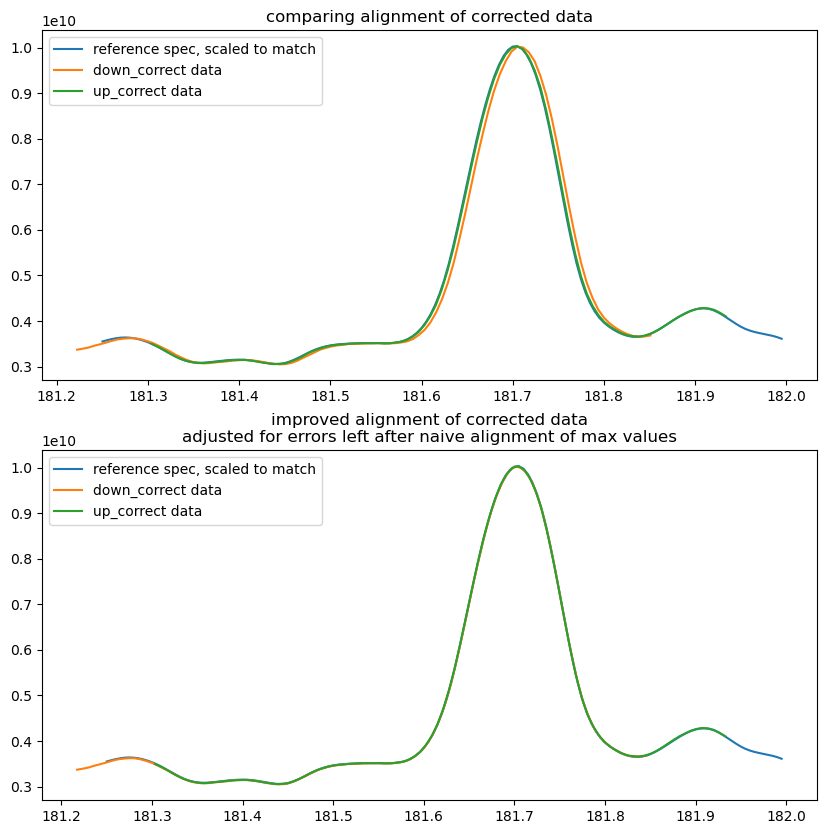

In [51]:
#create calibrated datasets for the observations here
up_counts = up[:, 2] - up_temp_counts
down_counts = down[:, 2] - down_temp_counts
dark_counts = dark[:, 2] - dark_temp_counts
up_waves = up_wave_dopp+up_wave_offset
down_waves = down_wave_dopp+down_wave_offset

up_correct =np.rot90(np.asarray([up[:,0],up_waves,up_counts]))
down_correct =np.rot90(np.asarray([down[:,0],down_waves,down_counts]))

fig, axs = mp.subplots(2, 1, figsize=(10, 10))
axs[0].title.set_text('comparing alignment of corrected data')
axs[0].plot(refe_spec[1850:2000, 0], refe_spec[1850:2000, 1]*np.max(up_correct[:,2])/np.max(refe_spec[:,1]))
axs[0].plot(down_correct[1450:1550,1],down_correct[1450:1550,2])
axs[0].plot(up_correct[1150:1250,1],up_correct[1150:1250,2])
axs[0].legend(
	['reference spec, scaled to match',
	 'down_correct data',
	 'up_correct data',]
	)
#there are expected alignment errors less than 0.00633nm due to width of the wavelength bins, so I'm going to eyeball a correction to the two data lines.
axs[1].title.set_text('improved alignment of corrected data\nadjusted for errors left after naive alignment of max values')
axs[1].plot(refe_spec[1850:2000, 0], refe_spec[1850:2000, 1]*np.max(up_correct[:,2])/np.max(refe_spec[:,1]))
axs[1].plot(down_correct[1450:1550,1]-0.005,down_correct[1450:1550,2])
axs[1].plot(up_correct[1150:1250,1]-0.001,up_correct[1150:1250,2])

axs[1].legend(
	['reference spec, scaled to match',
	 'down_correct data',
	 'up_correct data',]
	)

#redo corrected data with manual adjustments of 0.001nm and 0.005nm for up and down in place:
#the correction was done with a matched pair of laser corrected, precisely calibrrated eyeballs.
up_correct =np.rot90(np.asarray([up[:,0],up_waves-0.001,up_counts]))
down_correct =np.rot90(np.asarray([down[:,0],down_waves-0.005,down_counts]))

In [11]:
#scale the data to photons/(meter^2 * seconds)
#from:
# apertureArea = .01 / (1E2 * 1E2)  # [m^2] (aperature area from cm^2 to m^2)
# photonsPerSecondPerM2 = (count_rate_corr - median_dark_count_rate) / apertureArea  [photons/sec/m^2/nm]
# h = 6.62606957E-34  # [J*s]
# c = 299792458.0  # [m/s]
# energyPerPhoton = h * c / wavelengthInMeters  # [J]
# wattsPerM2 = photonsPerSecondPerM2 * energyPerPhoton  # [watts/m^2/nm]
# wattsPerM2_1AU = wattsPerM2 / sunObserverDistanceCorrection  # [watts/m^2/nm]



2517

In [33]:
down_waves[1499]-down_waves[1500]


-0.006339413449239828